# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
from pathlib import Path
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Set API Key path to env file
api_key_path = Path('C:/Users/markf/Desktop/Fintech SMU/API_Keys/.env')

In [3]:
# Set environment variables from the .env file
load_dotenv(api_key_path)

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

In [5]:
print(type(PLAID_CLIENT_ID))
print(type(PLAID_SBX_SECRET_KEY))
print(type(PLAID_PUBLIC_KEY))


<class 'str'>
<class 'str'>
<class 'str'>


---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [6]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')


In [7]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [8]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Print the public token
print(create_tkn_response)

{'public_token': 'public-sandbox-616e3a5b-e2b4-40a0-9f61-472a08ec99c8', 'request_id': 'sGFPk3Ut2LPmbf7'}


### 3. Exchange the public token for an access token

In [9]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Print the access toke
print(exchange_response)

# Store the access token in a Python variable
access_token = exchange_response['access_token']


{'access_token': 'access-sandbox-7644d41f-3425-406e-99d7-106347a6cf65', 'item_id': 'wVrWvDazn8h13P4k6gRJcK4njn1v4XirXVjPk', 'request_id': 'KDHrYVSjZ7vtIOH'}


### 4. Fetch Accounts

In [10]:
# Retrieve accounts
accounts = client.Accounts.get(access_token)
# Print accounts
print(json.dumps(accounts, indent = 4, sort_keys = True))

{
    "accounts": [
        {
            "account_id": "MMkpJ9r1WKI3GyxXjBJQFwzal15W1pu9VVRX3",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "1pnbQrNeX9ILWKnNP8gEtXxrJQPoQWf5llP9B",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token,start_date,end_date)


# Print the transactions
print(json.dumps(transaction_response, indent = 4, sort_keys = True))

{
    "accounts": [
        {
            "account_id": "MMkpJ9r1WKI3GyxXjBJQFwzal15W1pu9VVRX3",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "1pnbQrNeX9ILWKnNP8gEtXxrJQPoQWf5llP9B",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

### 2. Print the categories for each transaction

In [12]:
# Create a for-loop to print the categories for each transaction
categories = []
for transactions in transaction_response['transactions']:
    category = transactions['category'][0]
    categories.append(category)

# Remove duplicates from list
categories = list(dict.fromkeys(categories))    
print(categories)


['Travel', 'Food and Drink', 'Payment', 'Shops', 'Transfer', 'Recreation']


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
dates = []
name = []
amount = []
categories = []
sub_categories = []

# Retrieve all the transactions
for transactions in transaction_response['transactions']:
    category = transactions['category'][0]
    categories.append(category)
    sub_cat = transactions['category'][-1]
    sub_categories.append(sub_cat)
    dates.append(transactions['date'])
    name.append(transactions['name'])
    amount.append(transactions['amount'])

# Populate the transactions DataFrame with the transactions data
df = pd.DataFrame(list(zip(dates, name, amount, categories, sub_categories)), columns = ['Date', 'Name', 'Amount', 'Category', 'Sub_Category'])

In [14]:
# Display sample data from the DataFrame    
df.head(20)

,Date,Name,Amount,Category,Sub_Category
0,2020-05-30,United Airlines,500.00,Travel,Airlines and Aviation Services
1,2020-05-28,Uber,6.33,Travel,Taxi
2,2020-05-25,Tectra Inc,500.00,Food and Drink,Restaurants
3,2020-05-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment,Payment
4,2020-05-24,KFC,500.00,Food and Drink,Fast Food
5,2020-05-24,Madison Bicycle Shop,500.00,Shops,Sporting Goods
6,2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment,Credit Card
7,2020-05-15,Uber,5.40,Travel,Taxi
8,2020-05-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer,Debit
9,2020-05-14,CD DEPOSIT .INITIAL.,1000.00,Transfer,Deposit


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [15]:
# Display data types
print(df.dtypes)

Date             object
Name             object
Amount          float64
Category         object
Sub_Category     object
dtype: object


In [17]:
# Make any required data type transformation
df['Name'].astype('str')
df['Date'] = pd.to_datetime(df['Date'])


In [18]:
# Set the date column as index
df.set_index('Date', inplace = True)

In [20]:
# Display sample data
df.head(10)

,Name,Amount,Category,Sub_Category
Date,,,,
2020-05-30,United Airlines,500.00,Travel,Airlines and Aviation Services
2020-05-28,Uber,6.33,Travel,Taxi
2020-05-25,Tectra Inc,500.00,Food and Drink,Restaurants
2020-05-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment,Payment
2020-05-24,KFC,500.00,Food and Drink,Fast Food
2020-05-24,Madison Bicycle Shop,500.00,Shops,Sporting Goods
2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment,Credit Card
2020-05-15,Uber,5.40,Travel,Taxi
2020-05-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer,Debit


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [21]:
# Fetch the income data
income = client.Income.get(access_token)
# Print the income data
print(json.dumps(income, indent = 4, sort_keys = True))

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "tzu3XIp2HSnyM1y"
}


In [22]:
# Determine the previous year's gross income and print the results
previous_year_income = client.Income.get(access_token)['income']['last_year_income_before_tax']
print(previous_year_income)

7285


In [23]:
# Determine the current monthly income and print the results
current_monthly_income = client.Income.get(access_token)['income']['income_streams'][0]['monthly_income']
print(current_monthly_income)


500


In [24]:
# Determine the projected yearly income and print the results
projected_yearly_income = client.Income.get(access_token)['income']['projected_yearly_income']
projected_yearly_income

6085

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [25]:
# Compute the total expenses per category
expense_df = df.drop(columns = ['Name', 'Sub_Category'])
total_expense_category = expense_df.groupby(['Category']).sum().sort_values('Amount', ascending = False)

In [26]:
# Display the expenses per catefory
total_expense_category.head(6)

,Amount
Category,
Transfer,20537.34
Payment,6310.50
Food and Drink,3317.19
Shops,1500.00
Recreation,235.50
Travel,35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B258D49748>],
      dtype=object)

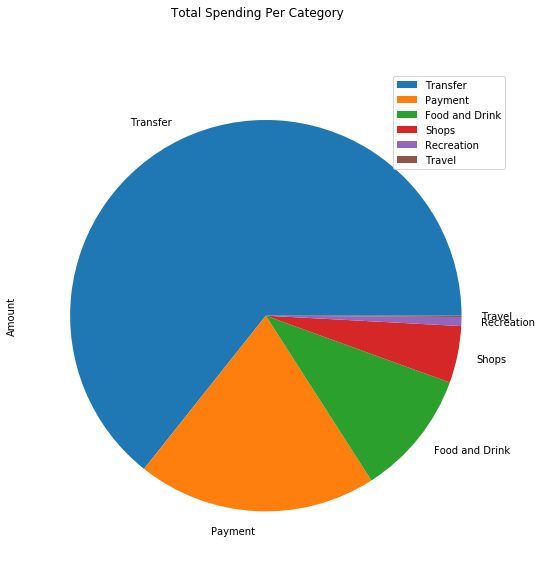

In [51]:
# Create a spending categories pie chart.
total_expense_category.plot.pie(subplots=True, figsize = (9,9), title="Total Spending Per Category")


### Calculate the expenses per category

In [28]:
# Create a DataFrame with the total expenses
total_expense_df = df.filter(['Category', 'Amount']).groupby(['Category']).sum().sort_values('Amount', ascending = False)
# Display sample data
total_expense_df.head()

,Amount
Category,
Transfer,20537.34
Payment,6310.50
Food and Drink,3317.19
Shops,1500.00
Recreation,235.50


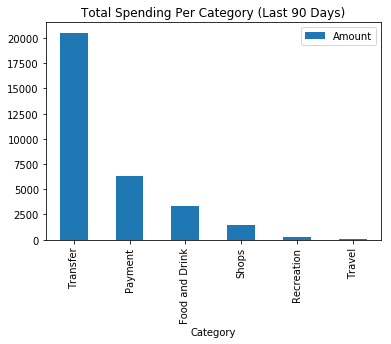

In [41]:
# Create a spending per month bar chart
total_expense_df.plot.bar(title="Total Spending Per Category (Last 90 Days)")


### Calculate Expense Per Month

In [37]:
# create data fram for total expenses
exp_per_mo_df = df.filter(['Date', 'Category','Amount'])

# set date to index and conver to months
exp_per_mo_df.index = pd.to_datetime(exp_per_mo_df.index)

# group index by month and sum for each month
monthly_expenses = exp_per_mo_df.groupby(exp_per_mo_df.index.month).sum()


In [38]:
exp_group.head()

,Amount
Date,
3,10645.24
4,10645.24
5,10645.24


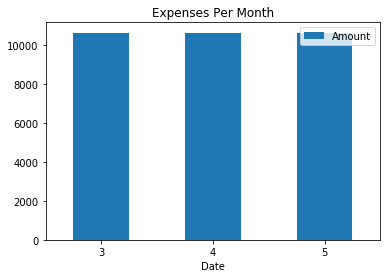

In [40]:
exp_group.plot(kind='bar',rot=0, title="Expenses Per Month")